In [76]:
import numpy as np
import matplotlib.pyplot as plt

In [77]:
def f(x: float) -> float:
    return -x

In [78]:
points_num: int = 50
t: np.ndarray = np.linspace(0.0, 3.0, points_num)
t_extra: np.ndarray = np.linspace(0.0, 3.0, 100)
h_n: float = t[1] - t[0]
h_n_extra: float = t_extra[1] - t_extra[0]

def euler(t_distance: list, step: float) -> np.ndarray:
    y_n: list = []
    y_n.append(1)
    t: list = t_distance
    for i, _ in enumerate(t, 1):
        y_n.append(y_n[i-1] + step*f(y_n[i-1]))
    return y_n

In [79]:
def kuta_2(t_distance: list, step: float) -> np.ndarray:
    t: list = t_distance
    y_n: list = []
    y_n.append(1)
    for i, _ in enumerate(t, 1):
        y_n.append(y_n[i-1] + step*f(y_n[i-1] + step*f(y_n[i-1])/2))
    return y_n


In [80]:
def kuta_4(t_distance: list, step: float) -> np.ndarray:
    t: list = t_distance
    y_n: list = []
    y_n.append(1)
    for i, _ in enumerate(t, 1):
        k_1: float = f(y_n[i-1])
        k_2: float = f(y_n[i-1] + step*k_1/2)
        k_3: float = f(y_n[i-1] + step*k_2/2)
        k_4: float = f(y_n[i-1] + step*k_3)
        y_n.append(y_n[i-1] + step*(k_1 + 2*k_2 + 2*k_3 + k_4)/6)
    return y_n

In [83]:
first = (kuta_2(t_extra, h_n_extra)[40] - np.exp(-t_extra)[40]) / (kuta_2(t, h_n)[20] - np.exp(-t)[20])
second = (kuta_4(t_extra, h_n_extra)[40] - np.exp(-t_extra)[40]) / (kuta_4(t, h_n)[20] - np.exp(-t)[20])
third = (euler(t_extra, h_n_extra)[40] - np.exp(-t_extra)[40]) / (euler(t, h_n)[20] - np.exp(-t)[20])
first, second, third

(0.2398084466844212, 0.058614220339592085, 0.49046751870612665)

In [82]:
euler_result = euler(t)[:-1]
kuta_2_result = kuta_2(t)[:-1]
kuta_4_result = kuta_4(t)[:-1]
theor_result: list = np.exp(-t)
euler_error = theor_result - euler_result
kuta_2_error = theor_result - kuta_2_result
kuta_4_error = theor_result - kuta_4_result

TypeError: euler() missing 1 required positional argument: 'step'

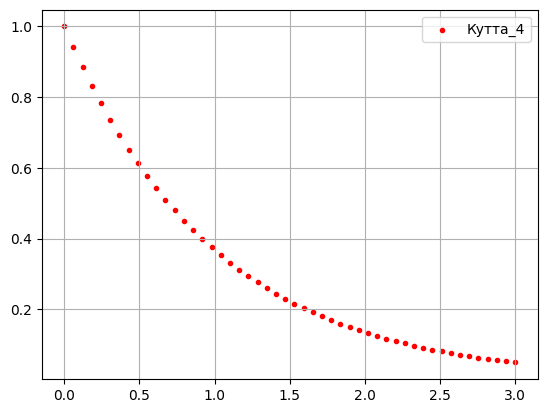

In [ ]:
fig = plt.figure(111)
ax = fig.add_subplot()
plt.grid(True)
colors: list = ['green', 'blue', 'red']
markers: list = ['*', '^', '.']
line = ax.scatter(t, kuta_4_result, marker=markers[2], c=colors[2])
ax.legend([line], ['Кутта_4'])
plt.show()

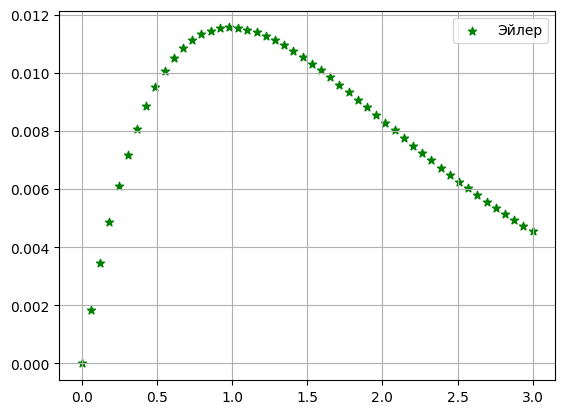

In [ ]:
fig = plt.figure(111)
ax = fig.add_subplot()
plt.grid(True)
colors: list = ['green', 'blue', 'red']
markers: list = ['*', '^', '.']
line = ax.scatter(t, euler_error, marker=markers[0], c=colors[0])
ax.legend([line], ['Эйлер'])
plt.show()

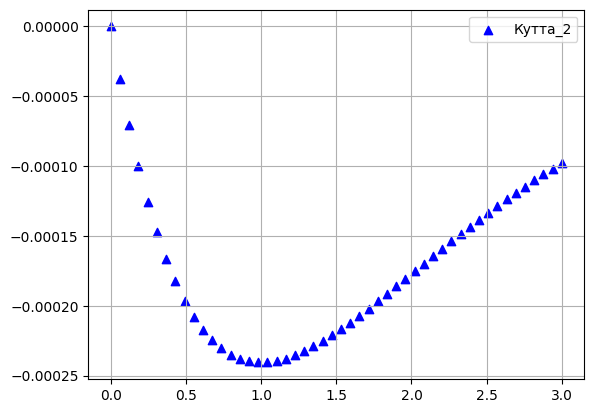

In [ ]:
fig = plt.figure(111)
ax = fig.add_subplot()
plt.grid(True)
colors: list = ['green', 'blue', 'red']
markers: list = ['*', '^', '.']
line = ax.scatter(t, kuta_2_error, marker=markers[1], c=colors[1])
ax.legend([line], ['Кутта_2'])
plt.show()

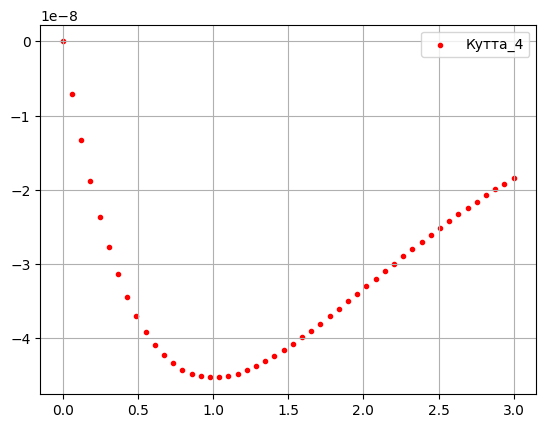

In [ ]:
fig = plt.figure(111)
ax = fig.add_subplot()
plt.grid(True)
colors: list = ['green', 'blue', 'red']
markers: list = ['*', '^', '.']
line = ax.scatter(t, kuta_4_error, marker=markers[2], c=colors[2])
ax.legend([line], ['Кутта_4'])
plt.show()

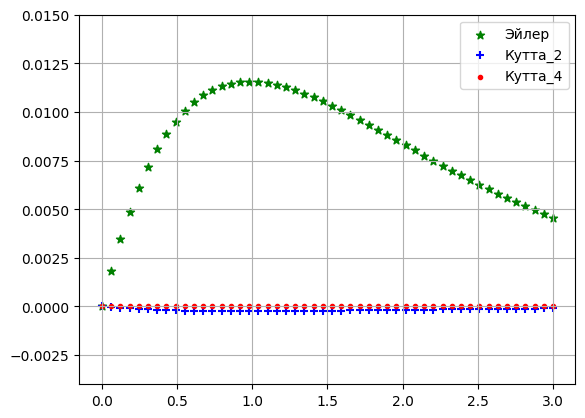

In [ ]:
fig = plt.figure(111)
ax = fig.add_subplot()
plt.ylim(-0.004, 0.015)
plt.grid(True)
colors: list = ['green', 'blue', 'red']
markers: list = ['*', '+', '.']
line_1 = ax.scatter(t, euler_error, marker=markers[0], c=colors[0])
line_2 = ax.scatter(t, kuta_2_error, marker=markers[1], c=colors[1])
line_3 = ax.scatter(t, kuta_4_error, marker=markers[2], c=colors[2])
ax.legend([line_1, line_2, line_3], ['Эйлер', 'Кутта_2', 'Кутта_4'])
plt.show()